In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
#creating my table

n = 1000
np.random.seed(42)

customer_id = np.random.randint(104503, 999999, size=n)
# Generate random ages
age = np.random.randint(16, 86, size=n)

# Generate random order IDs
order_id = np.random.randint(1001, 3999, size=n)

# Generate random order dates
order_date = pd.to_datetime(np.random.choice(pd.date_range(start='2023-01-01', end='2024-02-29'), size=n))

# Define a function to generate total spent based on age
def generate_total_spent(age):
    # Defining a correlation between age and total spent
    return np.round(age * np.random.uniform(5, 20), 2)  

# Generate total spent amounts based on age
total_spent = np.array([generate_total_spent(age) for age in age])

# Generate random payment methods
payment_method = np.random.choice(['Credit Card', 'Debit Card', 'Cash'], size=n)

# Generate random order statuses
order_status = np.random.choice(['Pending', 'Processing', 'Shipped', 'Delivered'], size=n)

# Define spend brackets and corresponding loyalty levels
spend_brackets = [(0, 400), (401, 800), (801, 1000), (1001, np.inf)]
loyalty_levels = ['Bronze', 'Silver', 'Gold', 'Platinum']

# Function to assign loyalty level based on total spent
def assign_loyalty_level(spent):
    for bracket, level in zip(spend_brackets, loyalty_levels):
        if bracket[0] <= spent <= bracket[1]:
            return level

# Generate loyalty levels based on total spent
loyalty_levels = np.array([assign_loyalty_level(spent) for spent in total_spent])



# Create my DataFrame
customer_data = pd.DataFrame({
    'customer_id': customer_id,
    'age': age,
    'order_id': order_id,
    'order_date': order_date,
    'total_spent $': total_spent,
    'payment_method': payment_method,
    'order_status': order_status,
    #'registration_date': registration_dates,
    #'total_spent': total_spent,
    'loyalty_level': loyalty_levels
})

customer_data.set_index('customer_id', inplace=True)
customer_data


,age,order_id,order_date,total_spent $,payment_method,order_status,loyalty_level
customer_id,,,,,,,
226461,32,1489,2023-10-13,299.44,Credit Card,Delivered,Bronze
775658,84,2348,2023-10-04,1012.19,Debit Card,Delivered,Platinum
236435,49,1494,2023-06-05,899.25,Debit Card,Delivered,Gold
470341,21,2668,2023-09-05,327.93,Cash,Shipped,Bronze
363681,68,2638,2023-08-06,403.45,Debit Card,Processing,Silver
...,...,...,...,...,...,...,...
537530,48,3773,2023-11-17,884.81,Credit Card,Shipped,Gold
612544,56,2250,2023-02-18,1043.71,Debit Card,Delivered,Platinum
422126,63,1982,2023-06-24,611.61,Cash,Delivered,Silver


In [57]:
customer_data.shape


(1000, 7)

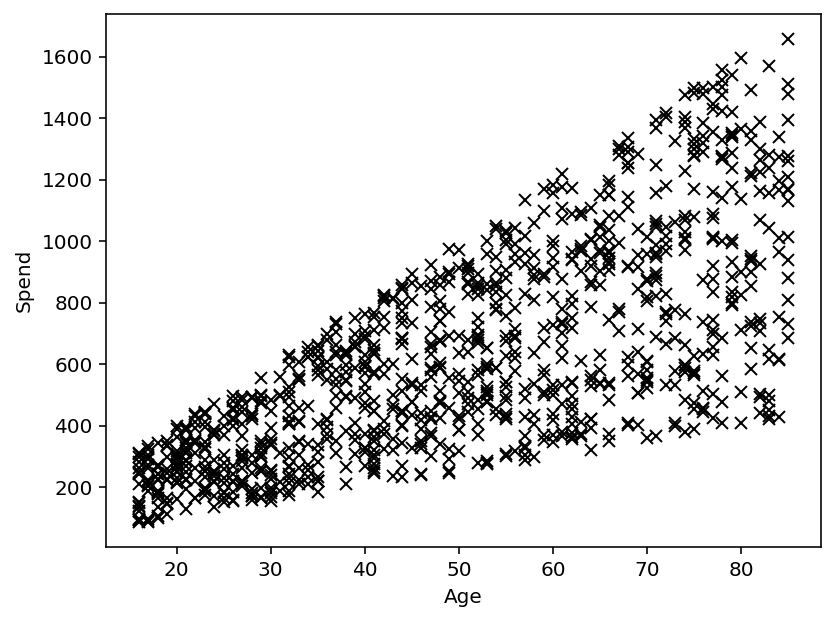

In [51]:
fig, ax = plt.subplots(dpi=144)
ax.plot(customer_data['age'], customer_data['total_spent $'], 'kx')
ax.set_xlabel('Age')
ax.set_ylabel('Spend')
plt.show()

In [55]:
customer_data.to_csv('customer data.csv')
customer_data[['total_spent $', 'order_id', 'payment_method']].to_csv('spend.csv')
customer_data[['order_id', 'order_date']].to_csv('orders.csv')
